# [6주차] 데이터에 생명을! Matplotlib 시각화 📊

안녕하세요! 6주차 수업이자, 파이썬 기초의 마지막 시간에 오신 것을 환영합니다.

지난 시간까지 우리는 파이썬과 NumPy를 이용해,

데이터를 저장하고 계산하는 법을 배웠습니다.

하지만 숫자로만 가득한 데이터는 우리에게 어떤 이야기도 해주지 않습니다.

오늘은 데이터 분석의 꽃, **Matplotlib** 라이브러리를 이용해,

데이터를 눈에 보이는 그림으로 바꾸는 **시각화**를 배워보겠습니다.

시각화를 통해 데이터 속에 숨겨진 패턴과 인사이트를 어떻게 발견할 수 있는지,

직접 확인해 보세요!

## 👀 모듈 1: 왜 데이터를 눈으로 봐야 할까?

- **"백문이 불여일견(百聞不如一見)"**
  * 백 번 듣는 것보다 한 번 보는 것이 낫다
  * 데이터 분석에서도 시각화는 핵심적인 역할을 합니다.
- **숫자만으로는 알 수 없는 것들**
  - **패턴과 추세**
    * 데이터가 시간에 따라 증가하는지,
    * 감소하는지,
    * 주기적인지 한눈에 파악할 수 있습니다.
  - **데이터 간의 관계**
    * 두 데이터가 서로 비례하는지,
    * 반비례하는지 쉽게 알 수 있습니다.
    * ex) 자동차 무게와 연비
  - **이상치(Outlier) 발견**
    * 다른 데이터들과 동떨어진 값
    * 시각적으로 쉽게 찾아낼 수 있습니다.
- **앤스콤 콰르텟 (Anscombe's Quartet)**
  - 통계 수치(평균, 분산 등)가 거의 동일하지만,
  - 시각화했을 때 전혀 다른 패턴을 보여주는 유명한 데이터셋
  - 데이터 분석에서 시각화가 왜 필수적인지 보여주는 대표적인 예시입니다.

- 앤스콤 콰르텟 데이터 구조
  * **Pandas의 DataFrame**이라는 형태로 되어있습니다.
  * 이는 NumPy 배열과 유사하지만, 각 행과 열에 이름표가 붙어있는,
    * 마치 **엑셀 스프레드시트**와 같은 형태입니다.
  * `anscombe` 데이터셋을 `print` 해보면 아래와 같이 보입니다.

<div align="center">

|No.|dataset|x|y|
|-|:-:|-|-|
|0|I|10.0|8.04|
|1|I|8.0|6.95|
|...|...|...|...|
|10|I|5.0|5.68|
|11|II|10.0|9.14|
|...|...|...|...|

</div>

* 우리의 목표
  * 'dataset' 열을 기준으로,
  * 4개의 그룹(I, II, III, IV)으로 데이터를 분리하여 각각 시각화하는 것입니다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 예제 데이터셋을 제공하는 라이브러리

# 1. 앤스콤 콰르텟 데이터셋 로드 (Pandas DataFrame 형태)
anscombe = sns.load_dataset("anscombe")

# 2. 데이터셋 구조 확인
print("--- 전체 데이터셋 (앞 5줄) ---")
print(anscombe.head())
print("\n--- 통계 수치 요약 ---")
# 'dataset' 열을 기준으로 그룹화하여 각 그룹의 통계치 계산
print(anscombe.groupby('dataset').describe())
print("\n=> 모든 데이터셋의 평균(mean), 표준편차(std) 등 통계치가 거의 동일합니다.")

# 3. 데이터 분리 (Boolean Indexing)
# anscombe['dataset'] == 'I'
#     >> 'dataset' 열의 값이 'I'인 행은 True, 아니면 False를 반환
# anscombe[ ... ]
#     >> 위에서 True가 나온 행만 전체 데이터프레임에서 선택
df1 = anscombe[anscombe['dataset'] == 'I']
df2 = anscombe[anscombe['dataset'] == 'II']
df3 = anscombe[anscombe['dataset'] == 'III']
df4 = anscombe[anscombe['dataset'] == 'IV']

--- 전체 데이터셋 (앞 5줄) ---
  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

--- 통계 수치 요약 ---
            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.9

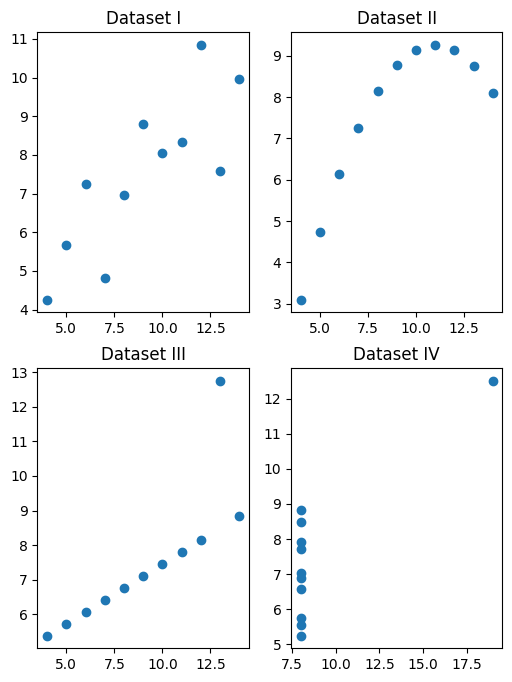


✨ 결과: 하지만 시각화해보니, 네 데이터셋은 완전히 다른 패턴을 가지고 있었습니다!


In [ ]:
# 4개의 데이터셋 시각화
# plt.subplots
#     >> 하나의 그림(figure) 안에 여러 개의 작은 그림(axes)을 생성
fig, axes = plt.subplots(2, 2, figsize=(6, 8))
axes[0, 0].scatter(df1['x'], df1['y'])
axes[0, 0].set_title("Dataset I")
axes[0 ,1].scatter(df2['x'], df2['y'])
axes[0, 1].set_title("Dataset II")
axes[1, 0].scatter(df3['x'], df3['y'])
axes[1, 0].set_title("Dataset III")
axes[1, 1].scatter(df4['x'], df4['y'])
axes[1, 1].set_title("Dataset IV")

plt.show()
print("\n✨ 결과: 하지만 시각화해보니, 네 데이터셋은 완전히 다른 패턴을 가지고 있었습니다!")

## 📈 모듈 2: Matplotlib 기본 그래프 그리기

Matplotlib은 매우 다양한 그래프를 그릴 수 있지만,

오늘은 가장 기본적이면서도 중요한 두 가지 그래프를 배워보겠습니다.

1.  **선 그래프 (Line Plot)**: `plt.plot()`
    - 시간의 흐름에 따른 데이터의 **변화 추세**를 보여줄 때 유용합니다.
      * ex) 주가, 기온 변화
2.  **산점도 (Scatter Plot)**: `plt.scatter()`
    - 두 데이터 사이의 **관계(상관관계)**를 보여줄 때 유용합니다.
      * ex) 공부 시간과 시험 점수, 키와 몸무게

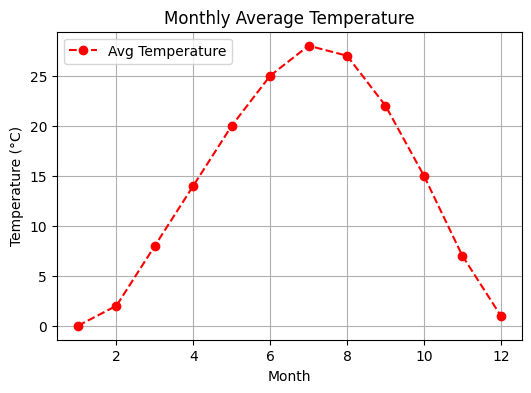

In [ ]:
import numpy as np

# 데이터 준비: 1월부터 12월까지의 월, 평균 기온
months = np.arange(1, 13)
temperatures = np.array([0, 2, 8, 14, 20, 25, 28, 27, 22, 15, 7, 1])

# 1. 그래프를 그릴 도화지(figure) 준비
# figsize=(6, 4)는 가로 6인치, 세로 4인치 크기의 도화지를 의미합니다.
# 숫자를 바꾸면 그래프의 크기가 변합니다.
plt.figure(figsize=(6, 4))

# 2. 선 그래프(plot) 그리기
# plt.plot(x축_데이터, y축_데이터)
# color: 선 색상 ('blue', 'red', 'g', 'k' 등)
# linestyle: 선 스타일 ('-' 실선, '--' 점선, ':' 땡땡이선)
# marker: 각 데이터 포인트를 표시할 모양 ('o' 동그라미, 's' 사각형, 'x')
# label: 이 선이 무엇을 의미하는지 범례에 표시될 이름
plt.plot(months, temperatures,
         color='red',
         linestyle='--',
         marker='o',
         label='Avg Temperature')

# 3. 그래프 꾸미기
plt.title("Monthly Average Temperature") # 제목
plt.xlabel("Month") # x축 이름
plt.ylabel("Temperature (°C)") # y축 이름
plt.grid(True) # 격자무늬 추가
plt.legend() # label을 표시할 범례 추가

# 4. 그래프 보여주기
plt.show()

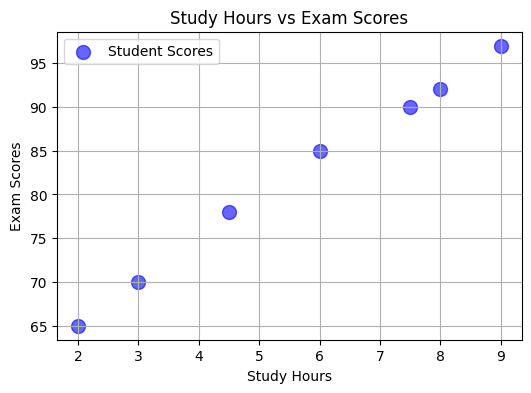

In [ ]:
# 데이터 준비: 학생들의 공부 시간과 시험 점수
study_hours = np.array([2, 3, 4.5, 6, 7.5, 8, 9])
exam_scores = np.array([65, 70, 78, 85, 90, 92, 97])

# 1. 도화지 준비
plt.figure(figsize=(6, 4))

# 2. 산점도(scatter) 그리기
# plt.scatter(x축_데이터, y축_데이터)
# s: 점의 크기 (size)
# c: 점의 색상 (color)
# alpha: 점의 투명도 (0.0 ~ 1.0). 점이 겹칠 때 유용합니다.
plt.scatter(study_hours, exam_scores,
            s=100,
            c='blue',
            alpha=0.6,
            label='Student Scores')

# 3. 그래프 꾸미기
plt.title("Study Hours vs Exam Scores")
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.grid(True)
plt.legend()

# 4. 그래프 보여주기
plt.show()

## 🎨 모듈 3: 여러 그래프 겹쳐 그리기

* `plt.show()`를 호출하기 전까지
  * 그리는 모든 그래프는 같은 도화지에 겹쳐서 그려집니다.
  * 데이터를 모델의 예측 결과와 비교하는 등 풍부한 시각화를 할 수 있습니다.


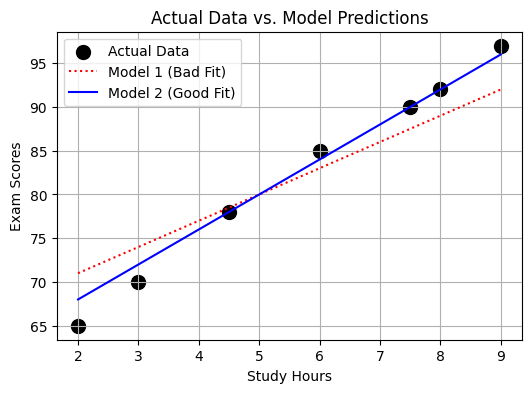

두 모델의 예측 결과를 실제 데이터와 비교하며 어떤 모델이 더 나은지 직관적으로 판단할 수 있습니다.


In [ ]:
# 실제 데이터
study_hours = np.array([2, 3, 4.5, 6, 7.5, 8, 9])
exam_scores = np.array([65, 70, 78, 85, 90, 92, 97])

# 가상의 두 예측 모델
# 모델 1: 예측을 잘 못한 모델
W1, b1 = 3, 65
predicted1 = W1 * study_hours + b1
# 모델 2: 예측을 비교적 잘 한 모델
W2, b2 = 4, 60
predicted2 = W2 * study_hours + b2

# --- 그래프 겹쳐 그리기 ---
plt.figure(figsize=(6, 4))

# 1. 실제 데이터는 산점도로 그리기 (기준)
plt.scatter(study_hours, exam_scores,
            c='black', s=100, label='Actual Data')

# 2. 모델 1의 예측은 빨간 점선으로 그리기
plt.plot(study_hours, predicted1,
         color='red', linestyle=':',
         label='Model 1 (Bad Fit)')

# 3. 모델 2의 예측은 파란 실선으로 그리기
plt.plot(study_hours, predicted2,
         color='blue', linestyle='-',
         label='Model 2 (Good Fit)')

# 4. 그래프 꾸미기
plt.title("Actual Data vs. Model Predictions")
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.grid(True)
plt.legend()

# 5. 그래프 보여주기
plt.show()
print("두 모델의 예측 결과를 실제 데이터와 비교하며 어떤 모델이 더 나은지 직관적으로 판단할 수 있습니다.")

```

































```



































